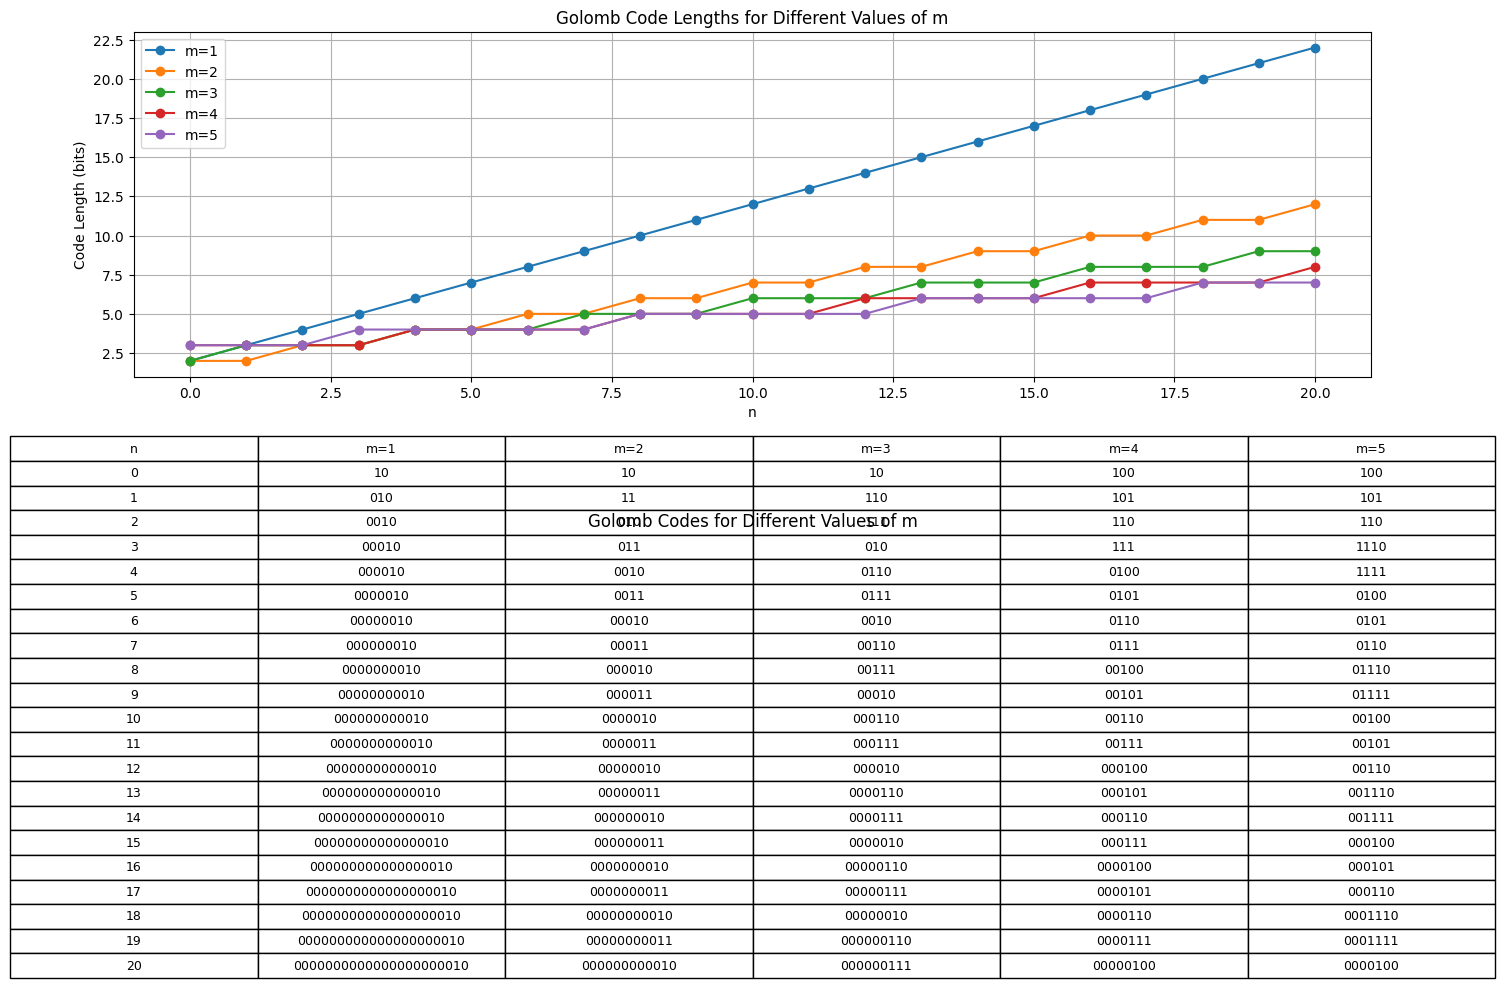


Detailed Golomb Coding Analysis:

For each value of m, showing the breakdown of encoding for n=0 to 20:

m = 1:
  n |   q |   r | length | code
--------------------------------------------------
  0 |   0 |   0 |      2 | 10
  1 |   1 |   0 |      3 | 010
  2 |   2 |   0 |      4 | 0010
  3 |   3 |   0 |      5 | 00010
  4 |   4 |   0 |      6 | 000010
  5 |   5 |   0 |      7 | 0000010
  6 |   6 |   0 |      8 | 00000010
  7 |   7 |   0 |      9 | 000000010
  8 |   8 |   0 |     10 | 0000000010
  9 |   9 |   0 |     11 | 00000000010
 10 |  10 |   0 |     12 | 000000000010
 11 |  11 |   0 |     13 | 0000000000010
 12 |  12 |   0 |     14 | 00000000000010
 13 |  13 |   0 |     15 | 000000000000010
 14 |  14 |   0 |     16 | 0000000000000010
 15 |  15 |   0 |     17 | 00000000000000010
 16 |  16 |   0 |     18 | 000000000000000010
 17 |  17 |   0 |     19 | 0000000000000000010
 18 |  18 |   0 |     20 | 00000000000000000010
 19 |  19 |   0 |     21 | 000000000000000000010
 20 |  20 |   

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def golomb_encode(n, m):
    """
    Implements Golomb encoding for a number n with parameter m.
    Returns the quotient (q), remainder (r), and the complete binary code.

    Parameters:
        n: The number to encode
        m: The Golomb parameter
    """
    # Calculate quotient and remainder
    q = n // m
    r = n % m

    # Create unary code for quotient (q zeros followed by a one)
    unary = '0' * q + '1'

    # Calculate number of bits needed for remainder
    c = int(np.ceil(np.log2(m)))

    # Calculate truncation parameter
    k = 2**c - m

    # Encode remainder
    if r < k:
        # Use c-1 bits for smaller remainders
        remainder = format(r, f'0{c-1}b')
    else:
        # Use c bits for larger remainders
        remainder = format(r + k, f'0{c}b')

    return unary + remainder, q, r, len(unary + remainder)

def analyze_golomb_codes(max_n=20, m_values=None):
    """
    Analyzes Golomb codes for numbers 0 to max_n using different m values.
    Returns the code lengths and generates visualizations.
    """
    if m_values is None:
        m_values = [1, 2, 3, 4, 5]

    # Store code lengths for each m and n
    code_lengths = np.zeros((len(m_values), max_n + 1))

    # Calculate codes and lengths for each combination
    codes = {}
    for i, m in enumerate(m_values):
        codes[m] = {}
        for n in range(max_n + 1):
            code, q, r, length = golomb_encode(n, m)
            codes[m][n] = {
                'code': code,
                'q': q,
                'r': r,
                'length': length
            }
            code_lengths[i, n] = length

    # Create visualization
    plt.figure(figsize=(15, 10))

    # Plot code lengths
    plt.subplot(2, 1, 1)
    for i, m in enumerate(m_values):
        plt.plot(range(max_n + 1), code_lengths[i, :],
                marker='o', label=f'm={m}')

    plt.title('Golomb Code Lengths for Different Values of m')
    plt.xlabel('n')
    plt.ylabel('Code Length (bits)')
    plt.grid(True)
    plt.legend()

    # Create table visualization
    plt.subplot(2, 1, 2)
    cell_text = []
    for n in range(max_n + 1):
        row = [str(n)]  # First column is n
        for m in m_values:
            code_info = codes[m][n]
            row.append(f"{code_info['code']}")
        cell_text.append(row)

    table = plt.table(cellText=cell_text,
                     colLabels=['n'] + [f'm={m}' for m in m_values],
                     loc='center',
                     cellLoc='center')

    # Adjust table appearance
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1.2, 1.5)

    plt.title('Golomb Codes for Different Values of m')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Print detailed analysis
    print("\nDetailed Golomb Coding Analysis:")
    print("\nFor each value of m, showing the breakdown of encoding for n=0 to 20:")

    for m in m_values:
        print(f"\nm = {m}:")
        print(f"{'n':>3} | {'q':>3} | {'r':>3} | {'length':>6} | code")
        print("-" * 50)
        for n in range(max_n + 1):
            code_info = codes[m][n]
            print(f"{n:3d} | {code_info['q']:3d} | {code_info['r']:3d} | "
                  f"{code_info['length']:6d} | {code_info['code']}")

# Run the analysis
analyze_golomb_codes()